## Visualisering av sammenhengen mellom luftkvalitet og temperatur

### Introduksjon til datasettet og visualiseringen

Denne koden leser inn to miljødatakilder:
- Meteorologiske data (temperatur) fra Meteorologisk institutt (Frost API)
- Luftkvalitetsmålinger (NO₂) fra Norsk institutt for luftforskning (NILU)

Begge datasettene inneholder en `Dato`-kolonne og kombineres gjennom en **indre join**, slik at kun datoer med data i begge kilder benyttes. Den resulterende datastrukturen benyttes til å visualisere **temperatur** og **NO₂-konsentrasjon** over tid i én felles graf med to y-akser.

### Formål og nytteverdi

Denne typen visualisering gir en oversikt over hvordan temperatur og luftforurensning (her representert ved nitrogendioksid – NO₂) utvikler seg over tid, og legger til rette for å identifisere mulige sammenhenger mellom meteorologiske forhold og luftkvalitet.

Spesielt er det nyttig å undersøke:
- Sesongvariasjoner i luftforurensning
- Samvariasjon mellom kaldt vær og forhøyede NO₂-nivåer
- Trender og avvik som kan indikere behov for tiltak eller videre analyser

### Hvorfor er NO₂ ofte høyere ved lavere temperaturer?

Ved kalde temperaturer – spesielt om vinteren – forekommer det ofte meteorologiske fenomener som **temperaturinversjon**. Dette skjer når et kaldt luftlag nær bakken fanges under et varmere luftlag høyere oppe. Inversjonen fungerer som et **lokk** som hindrer vertikal sirkulasjon i atmosfæren, og forurensning fra biltrafikk og annen forbrenning får ikke anledning til å spre seg eller løftes bort.

Konsekvensene av dette inkluderer:
- Akkumulering av NO₂ og andre forurensende stoffer nær bakkenivå
- Dårligere luftkvalitet i befolkningstette områder, spesielt i byer og dalfører
- Økt helserisiko, spesielt for utsatte grupper som barn, eldre og personer med luftveissykdommer

Ved å sammenligne NO₂ og temperatur visuelt i én graf, blir det lettere å identifisere slike mønstre og forstå **hvordan værforhold påvirker luftforurensningen**.

### Fordeler ved valgt visualiseringsmetode

- Bruk av to y-akser muliggjør en **intuitiv og presis sammenligning** mellom to dataserier med ulik skala.
- Tidslinjeformatet gir god **oversikt over utvikling og sesongvariasjon**.
- Bruk av farge og interaktive elementer gjør grafen **lett å lese og tolke**, også for ikke-eksperter.

Denne typen fremstilling er et nyttig verktøy for både forskere, forvaltningsorgan og beslutningstakere som arbeider med klima, byplanlegging eller folkehelse.


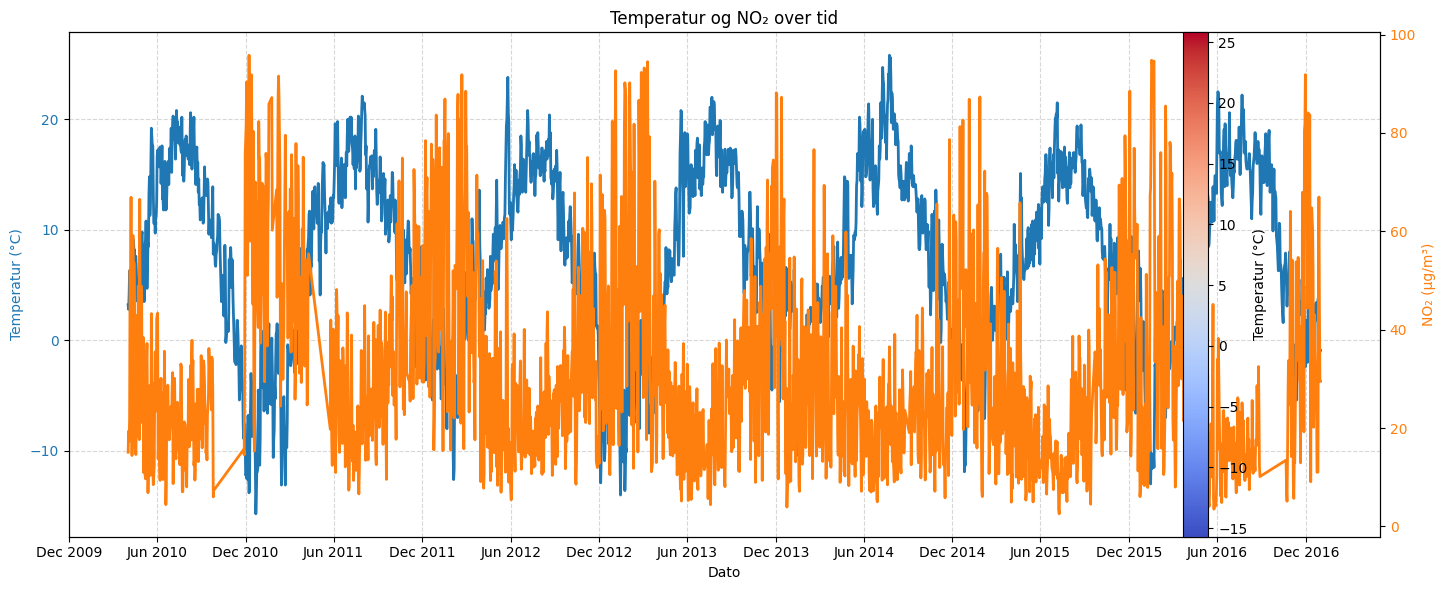

In [1]:
import sys

sys.path.insert(0, '../src/')
from kombinert_analyse import load_merge_and_plot_no2_temp
load_merge_and_plot_no2_temp()
